<a href="https://colab.research.google.com/github/showman-sharma/Bio-inspired-clustering/blob/master/KMEANSvsBIOCLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn import cluster, datasets, mixture
import imageio
import math

# The Bio-inspired clustering

In [ ]:
eps0=2e-2    # learning rate
hid=2   # number of hidden units that are displayed in Ky by Kx array
mu=0.0
sigma=1.0
Nep=20      # number of epochs
Num=10      # size of the minibatch
prec=1e-30
delta=0.4    # Strength of the anti-hebbian learning
p=2.0        # Lebesgue norm of the weights
k=2          # ranking parameter, must be integer that is bigger or equal than 2
a = 0.4      # activity, between 0 and 1

In [ ]:
#hid is number of clusters
def train(X,hid = hid,Num= Num,Nep=Nep,delta = delta,k=k,sigma=sigma,eps0=eps0,prec = prec):
  M = X.copy()  
  mu = np.mean(M,axis=0)
  M = M-mu
  N = M.shape[1]
  Ns = M.shape[0]
  synapses = np.random.normal(0, sigma, (hid, N))
  for nep in range(Nep):
      eps=eps0*(1-nep/Nep)
      M=M[np.random.permutation(Ns),:]
      for i in range(Ns//Num):
          inputs=np.transpose(M[i*Num:(i+1)*Num,:])
          sig=np.sign(synapses)
          tot_input=np.dot(sig*np.absolute(synapses)**(p-1),inputs)
          
          y=np.argsort(tot_input,axis=0)
          yl=np.zeros((hid,Num))
          yl[y[hid-1,:],np.arange(Num)]=1.0
          yl[y[hid-k],np.arange(Num)]=-delta
          
          xx=np.sum(np.multiply(yl,tot_input),1)
          ds=np.dot(yl,np.transpose(inputs)) - np.multiply(np.tile(xx.reshape(xx.shape[0],1),(1,N)),synapses)
          
          nc=np.amax(np.absolute(ds))
          if nc<prec:
              nc=prec
          synapses += eps*np.true_divide(ds,nc)
  return synapses,mu        

# Elbow method: Finding right number of clusters

In [ ]:
def totdotprod(X,synapses):
  x_mu = np.mean(X,axis=0)
  clusters =  np.argmax(np.dot(X-x_mu,synapses.T),axis = 1)
  ans = 0
  M = X-x_mu
  for i in range(synapses.shape[0]):
    #print(i)
    w = np.where(clusters==i)
    #print(M[w])
    #print(synapses[i,:])
    a = np.dot(M[w,:],synapses[i,:])
    #print(a.shape)
    ans += np.sum(a)
  return ans    

In [ ]:
def plot_elbow_bio(X,n_k,n_per_exp = 10):
  elbow = [0]*(n_k-1)
  for n_clus in range(1,n_k):
    synapses,x_mu = train(X,hid = n_clus,delta=1)
    ans = 0
    for i in range(n_per_exp):
      ans += totdotprod(X,synapses)/n_per_exp
    elbow[n_clus-1] = ans
  pyplot.figure(figsize=(15,15))  
  pyplot.plot(range(1,n_k),elbow);
  pyplot.xlabel('Number of cluster')
  pyplot.ylabel('Sum of Most Dot Products (MDP)')
  pyplot.title('Elbow plot')  

# Experiment 1

## The actual data

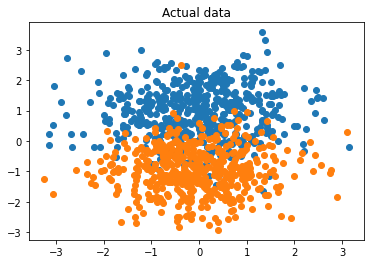

In [ ]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=3, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=10)
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

# show the plot
pyplot.title('Actual data')
pyplot.show()

In [ ]:
n_clus = 2

## Running K means

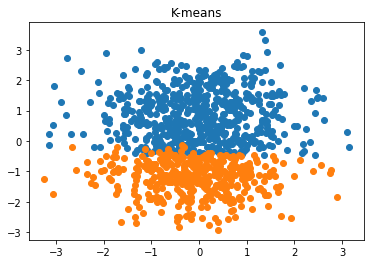

In [ ]:
# k-means clustering
# define the model
model = KMeans(n_clusters=n_clus)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title('K-means')
pyplot.show()

## Running Bio-clustering

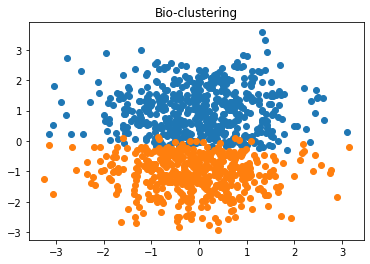

In [ ]:
synapses,x_mu = train(X,hid = n_clus)
clusters = np.argmax(np.dot(X-x_mu,synapses.T),axis = 1)
for i in range(n_clus):
	# get row indexes for samples with this cluster
	row_ix = where(clusters == i)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title('Bio-clustering')
pyplot.show()

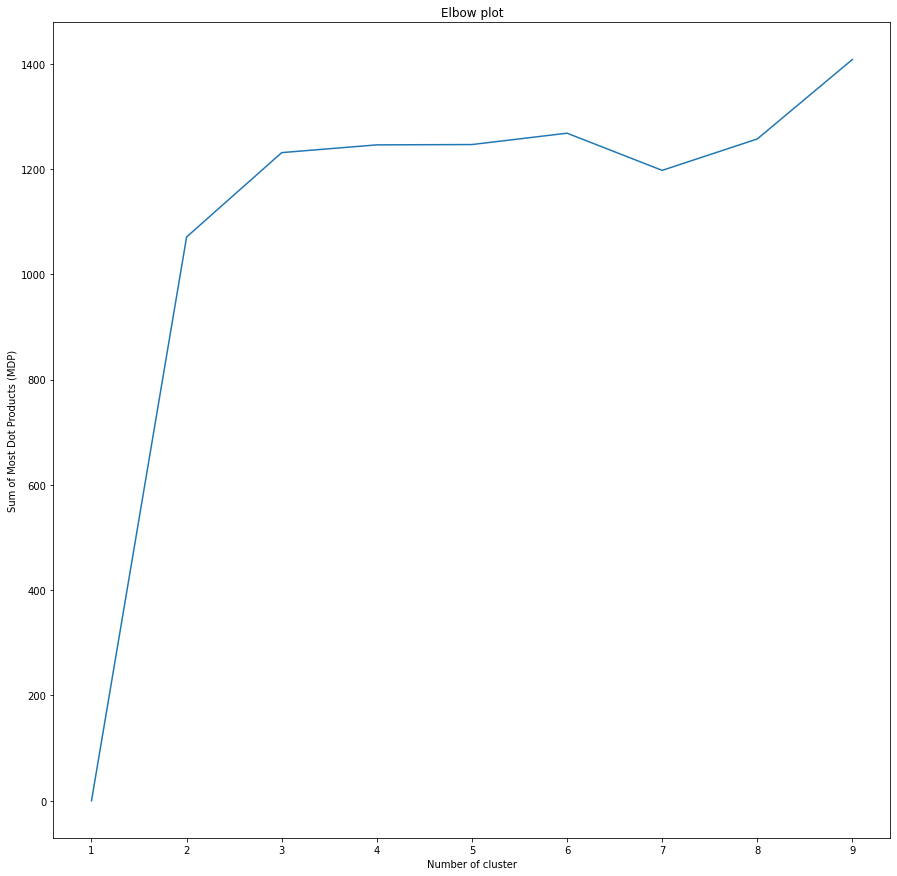

In [ ]:
plot_elbow_bio(X,10)

# Experiment 2

## The actual data

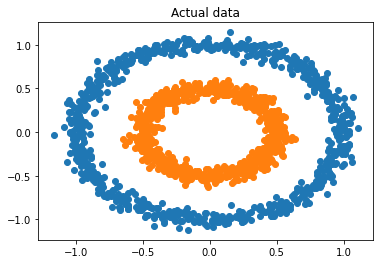

In [ ]:
# define dataset
X, y = datasets.make_circles(n_samples=1500, factor=.5,noise=.05)
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title('Actual data')
pyplot.show()

In [ ]:
n_clus = 2

## Running K means

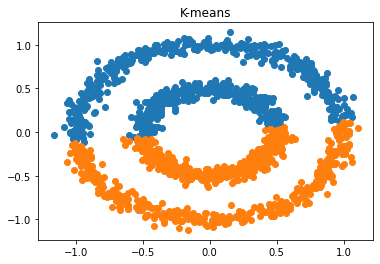

In [ ]:
# k-means clustering
# define the model
model = KMeans(n_clusters=n_clus)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title('K-means')
pyplot.show()

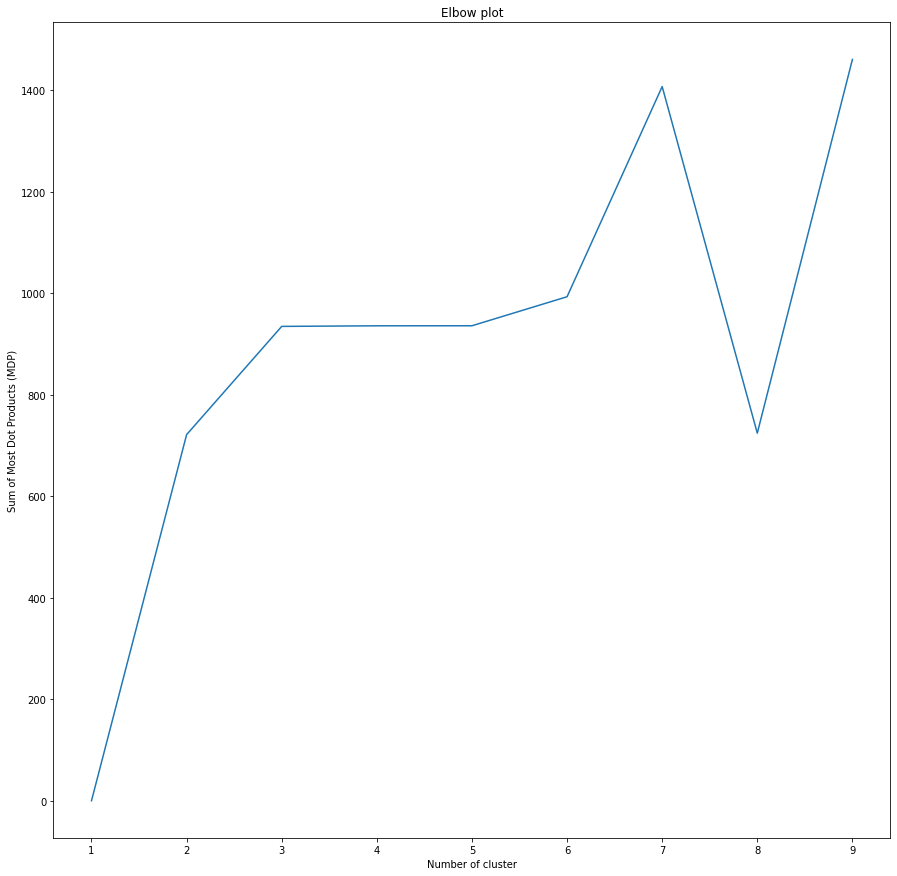

In [ ]:
plot_elbow_bio(X,10)

## Running Bio-clustering

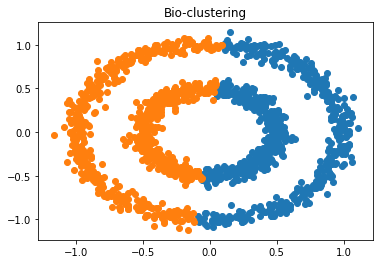

In [ ]:
synapses,x_mu = train(X,hid = n_clus)
clusters = np.argmax(np.dot(X-x_mu,synapses.T),axis = 1)
for i in range(n_clus):
	# get row indexes for samples with this cluster
	row_ix = where(clusters == i)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title('Bio-clustering')
pyplot.show()

# Experiment 3

## The actual data

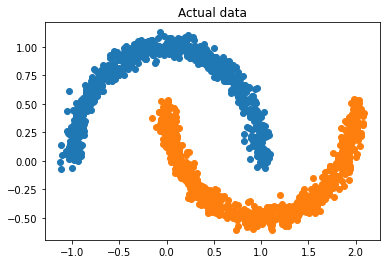

In [ ]:
# define dataset
X, y = datasets.make_moons(n_samples=1500, noise=.05)
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title('Actual data')
pyplot.show()

In [ ]:
n_clus = 2

## Running K means

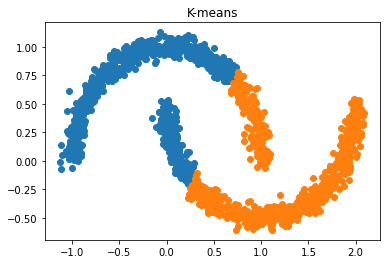

In [ ]:
# k-means clustering
# define the model
model = KMeans(n_clusters=n_clus)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title('K-means')
pyplot.show()

## Running Bio-clustering

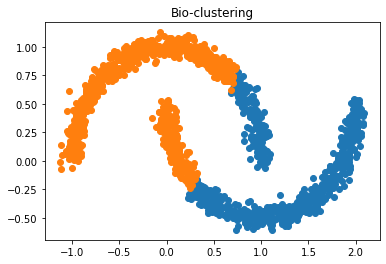

In [ ]:
synapses,x_mu = train(X,hid = n_clus)
clusters = np.argmax(np.dot(X-x_mu,synapses.T),axis = 1)
for i in range(n_clus):
	# get row indexes for samples with this cluster
	row_ix = where(clusters == i)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title('Bio-clustering')
pyplot.show()

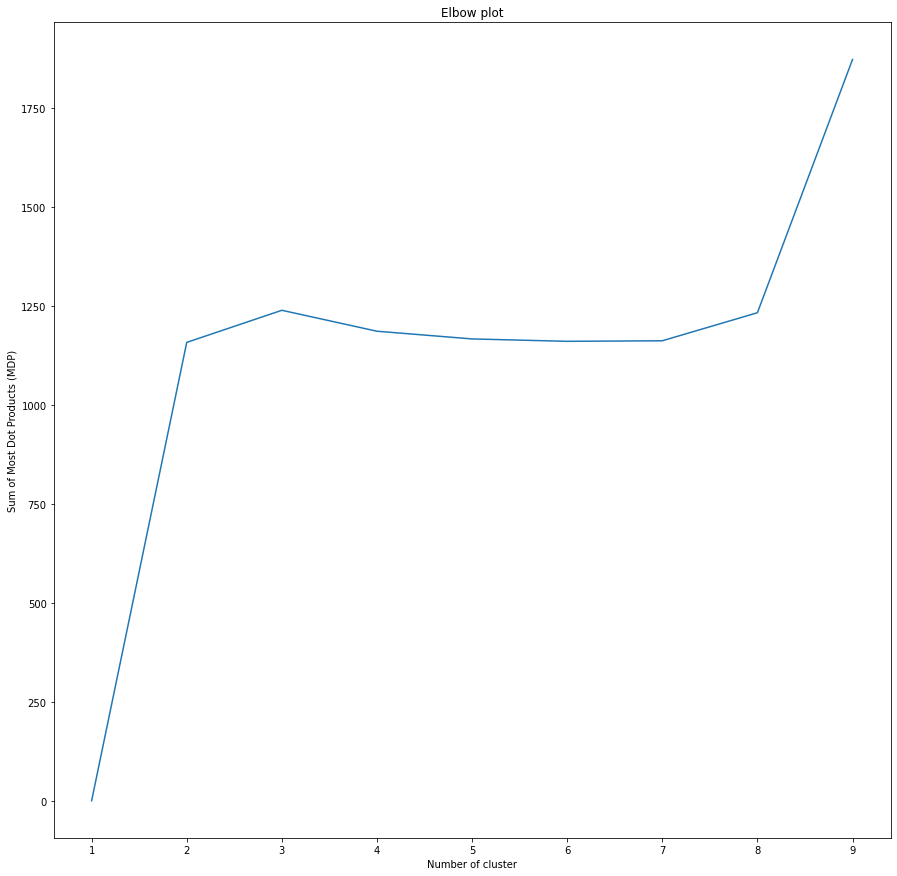

In [ ]:
plot_elbow_bio(X,10)

# Experiment 4

## The actual data

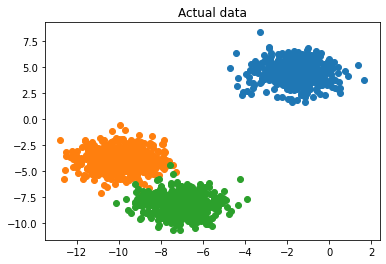

In [ ]:
# define dataset
X, y = datasets.make_blobs(n_samples=1500, random_state=1)
# create scatter plot for samples from each class
for class_value in range(3):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title('Actual data')
pyplot.show()

In [ ]:
n_clus = 3

## Running K means

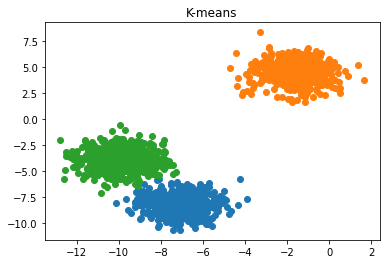

In [ ]:
# k-means clustering
# define the model
model = KMeans(n_clusters=n_clus)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title('K-means')
pyplot.show()

## Running Bio-clustering

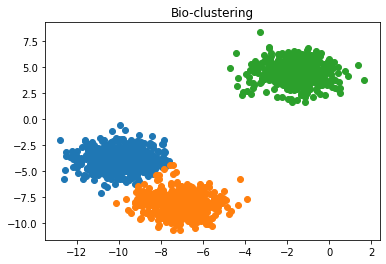

In [ ]:
synapses,x_mu = train(X,hid = n_clus,delta=1,Nep=30)
clusters = np.argmax(np.dot(X-x_mu,synapses.T),axis = 1)
for i in range(n_clus):
	# get row indexes for samples with this cluster
	row_ix = where(clusters == i)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title('Bio-clustering')
pyplot.show()

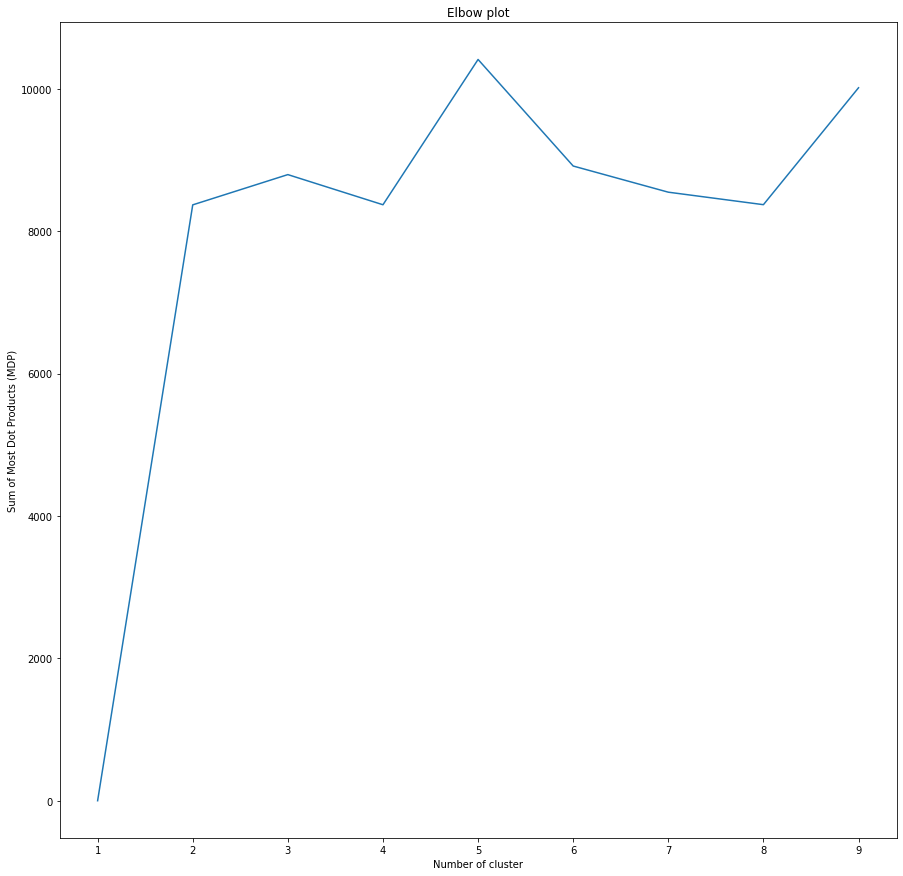

In [ ]:
plot_elbow_bio(X,10)

# Visualization of clustering in bio-clustering

In [ ]:
#hid is number of clusters
def show_train(X,hid = hid,Num= Num,Nep=Nep,delta = delta,k=k,sigma=sigma,eps0=eps0,prec = prec): 
  M = X.copy() - np.mean(X,axis=0)
  muX = np.mean(X,axis=0)
  #print(np.mean(M,axis=0))
  N = M.shape[1]
  Ns = M.shape[0]
  synapses = np.random.normal(0, sigma, (hid, N))
  with imageio.get_writer('bio_clustering.gif',mode='I') as writer:
    for nep in range(Nep):
        eps=eps0*(1-nep/Nep)
        M=M[np.random.permutation(Ns),:]
        for i in range(Ns//Num):
            inputs=np.transpose(M[i*Num:(i+1)*Num,:])
            sig=np.sign(synapses)
            tot_input=np.dot(sig*np.absolute(synapses)**(p-1),inputs)
            
            y=np.argsort(tot_input,axis=0)
            yl=np.zeros((hid,Num))
            yl[y[hid-1,:],np.arange(Num)]=1.0
            yl[y[hid-k],np.arange(Num)]=-delta
            
            xx=np.sum(np.multiply(yl,tot_input),1)
            ds=np.dot(yl,np.transpose(inputs)) - np.multiply(np.tile(xx.reshape(xx.shape[0],1),(1,N)),synapses)
            
            nc=np.amax(np.absolute(ds))
            if nc<prec:
                nc=prec
            synapses += eps*np.true_divide(ds,nc)
        pyplot.figure()
        for s in range(hid):
          #pyplot.scatter(synapses[s,0]+muX[0],synapses[s,1]+muX[1]) 
          pyplot.scatter(synapses[s,0],synapses[s,1]) 
        #pyplot.scatter(M[:,0]+muX[0],M[:,1]+muX[1],c = 'black',alpha = N/math.sqrt(Ns))
        pyplot.scatter(M[:,0],M[:,1],c = 'black',alpha = N/math.sqrt(Ns)) 
        pyplot.savefig('this.png')
        for fr in range(10):
          image = imageio.imread('this.png')
          writer.append_data(image)        
  return synapses ,mu       

## Visuals 1

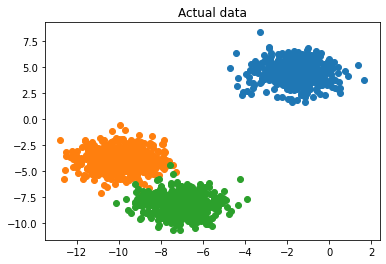

In [ ]:
# define dataset
X, y = datasets.make_blobs(n_samples=1500, random_state=1)
# create scatter plot for samples from each class
for class_value in range(3):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title('Actual data')
pyplot.show()

In [ ]:
 np.mean(X,axis=0)

array([-6.22473115, -2.55395766])

In [ ]:
n_clus=3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


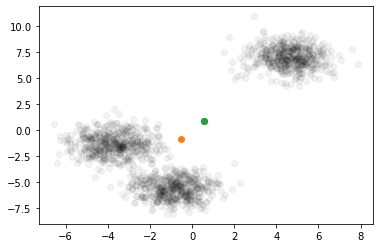

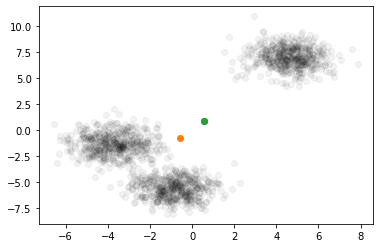

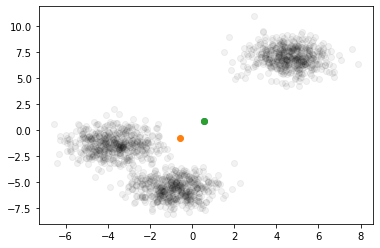

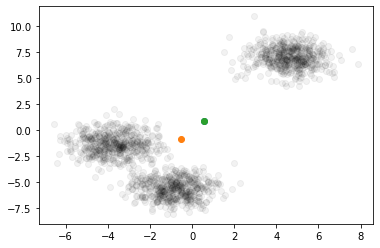

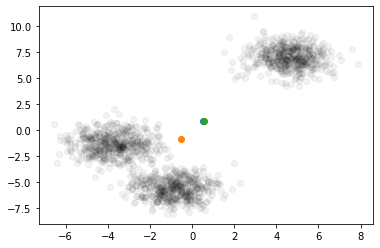

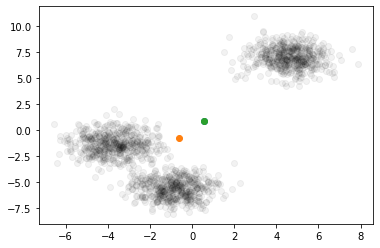

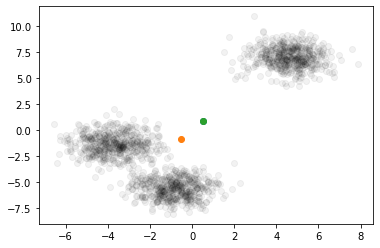

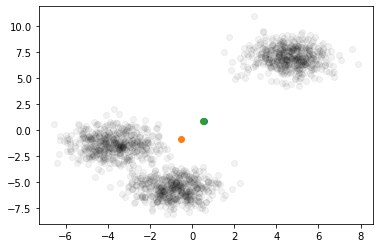

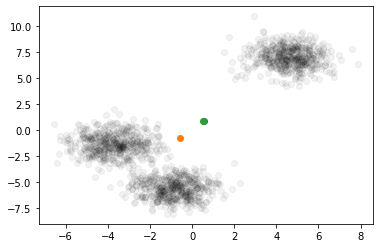

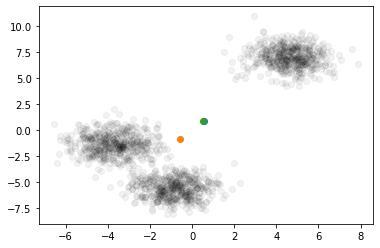

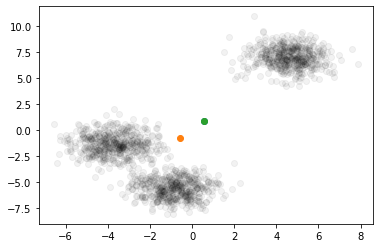

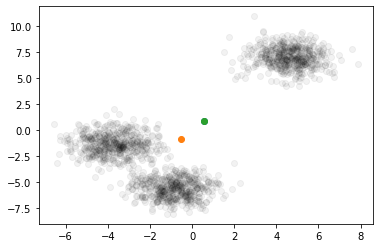

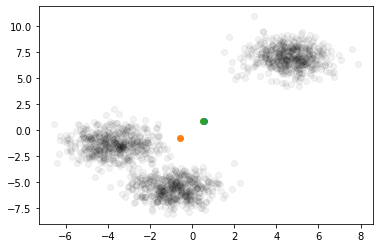

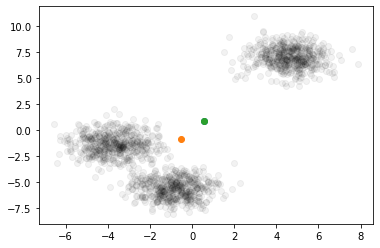

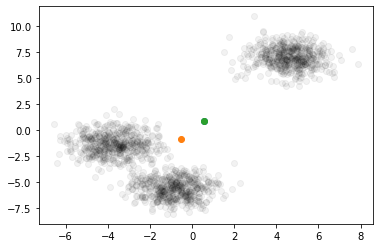

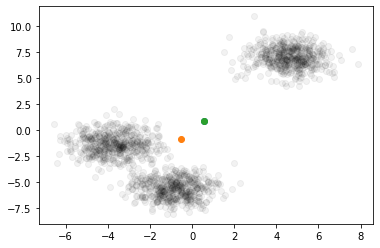

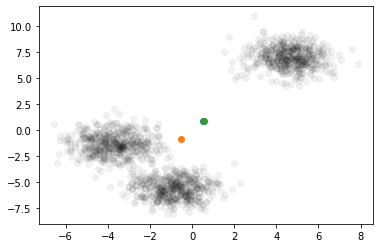

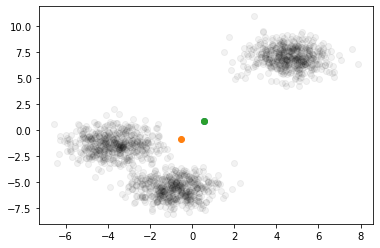

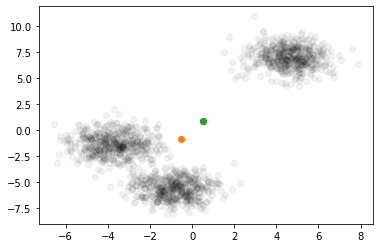

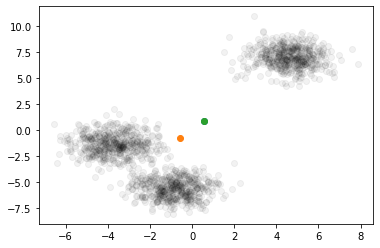

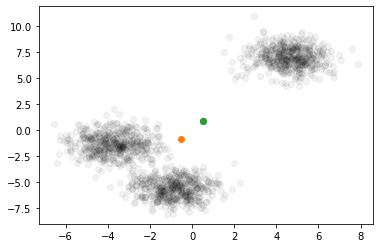

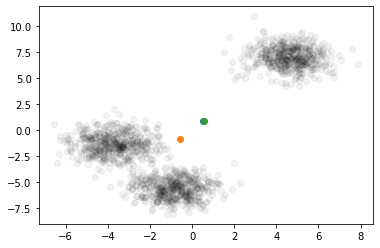

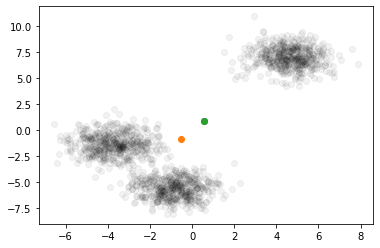

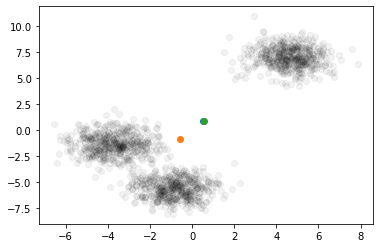

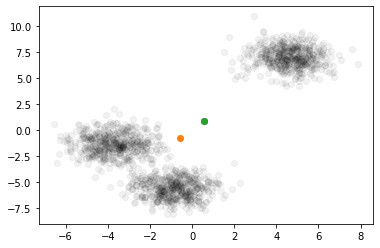

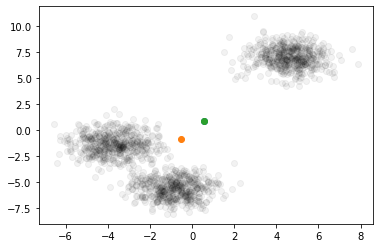

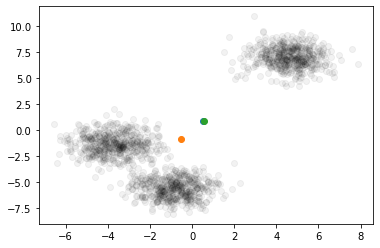

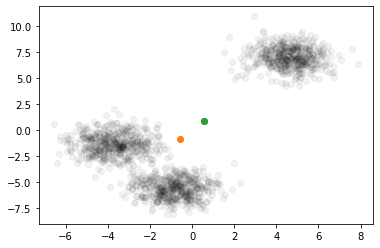

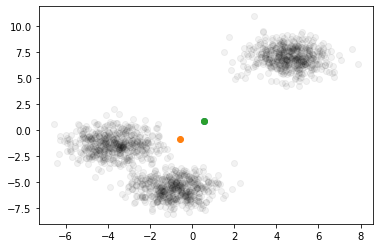

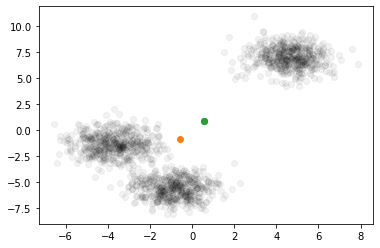

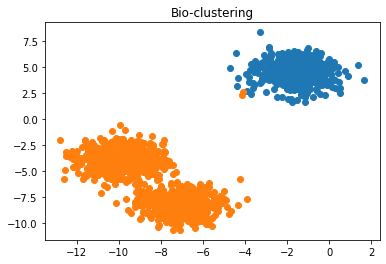

In [ ]:
synapses,x_mu = show_train(X,hid = n_clus,Nep=30)
clusters = np.argmax(np.dot(X-x_mu,synapses.T),axis = 1)
pyplot.figure()
for i in range(n_clus):
	# get row indexes for samples with this cluster
	row_ix = where(clusters == i)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title('Bio-clustering')
pyplot.show()

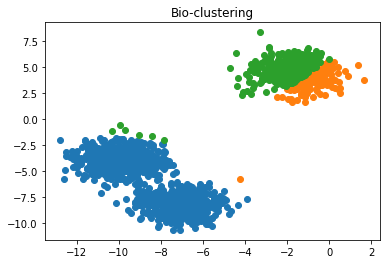

In [ ]:
synapses,x_mu = train(X,hid = n_clus,delta=1,Nep=30)
clusters = np.argmin(np.dot(X-x_mu,synapses.T),axis = 1)
pyplot.figure()
for i in range(n_clus):
	# get row indexes for samples with this cluster
	row_ix = where(clusters == i)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title('Bio-clustering')
pyplot.show()

## Visuals 2

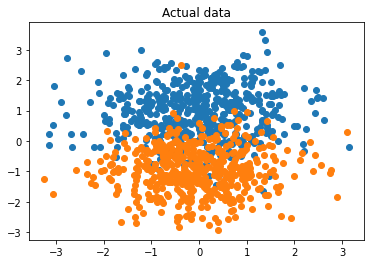

In [ ]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=3, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=10)
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

# show the plot
pyplot.title('Actual data')
pyplot.show()

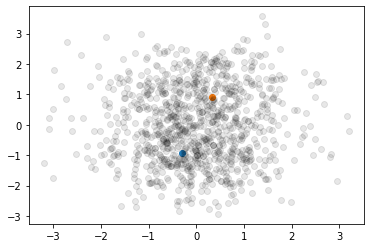

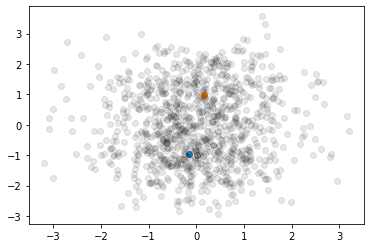

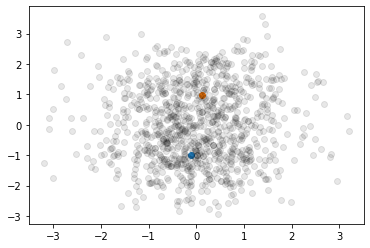

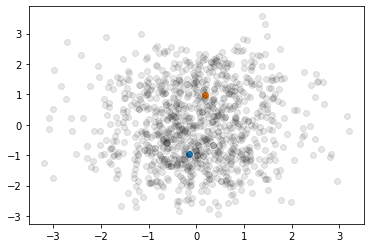

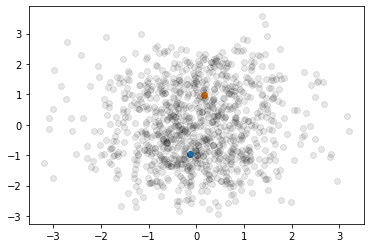

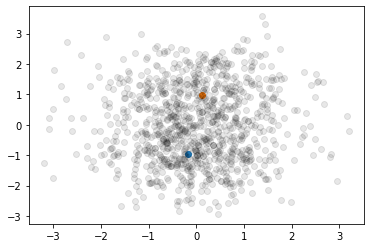

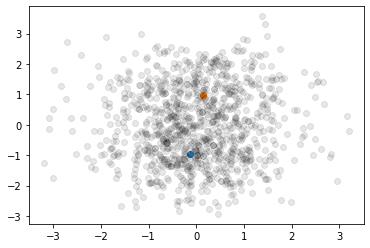

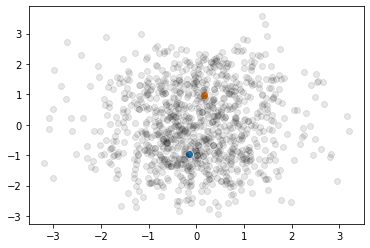

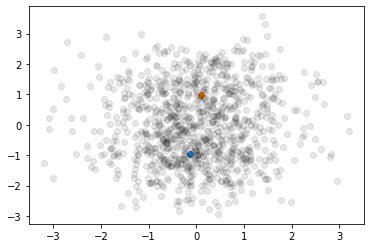

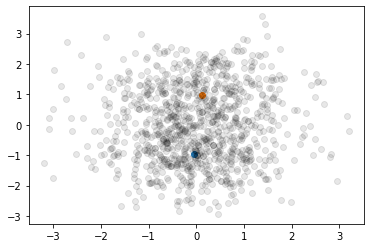

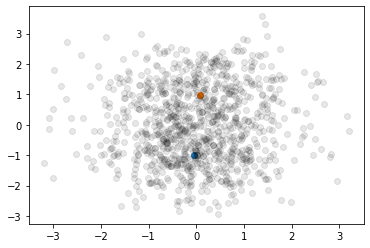

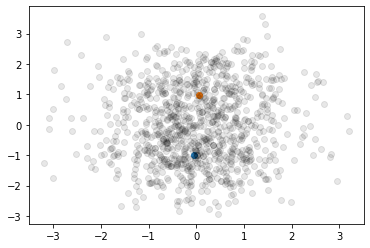

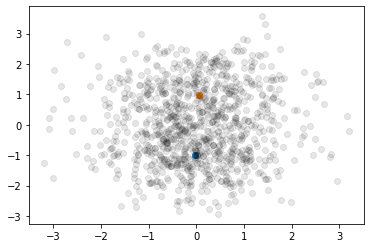

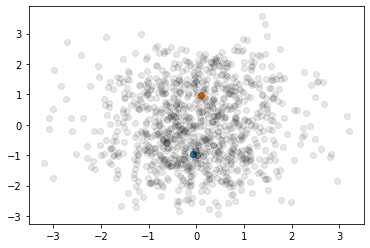

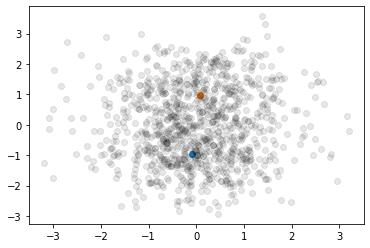

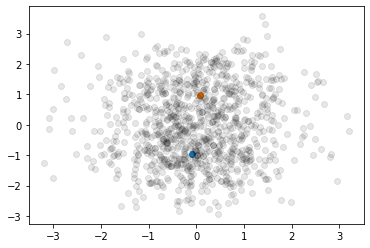

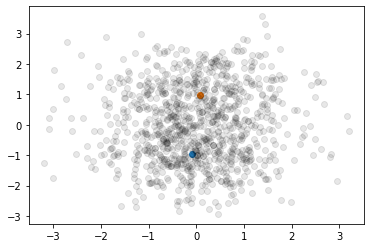

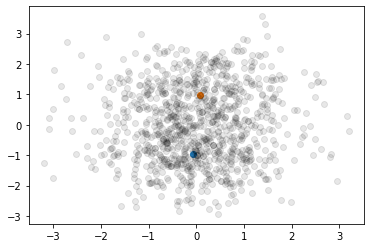

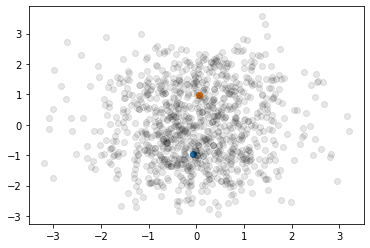

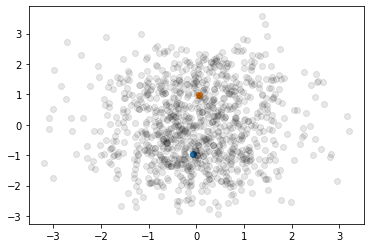

In [ ]:
synapses,x_mu = show_train(X,hid = 2)

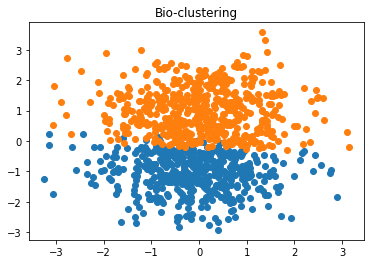

In [ ]:
synapses,x_mu = train(X,hid = 2)
clusters = np.argmax(np.dot(X-x_mu,synapses.T),axis = 1)
for i in range(2):
	# get row indexes for samples with this cluster
	row_ix = where(clusters == i)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title('Bio-clustering')
pyplot.show()

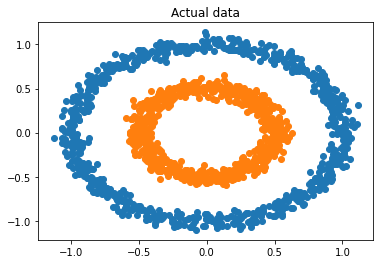

In [ ]:
# define dataset
X, y = datasets.make_circles(n_samples=1500, factor=.5,noise=.05)
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title('Actual data')
pyplot.show()

In [ ]:
np.mean(X,axis=0)

array([0.00233509, 0.00156945])

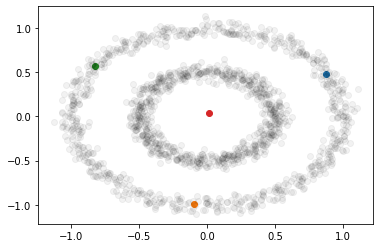

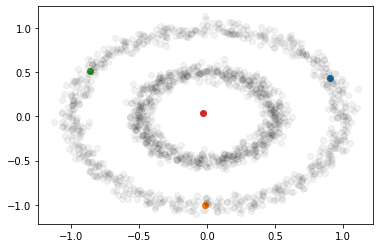

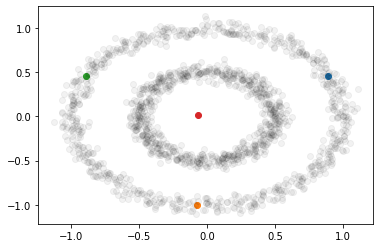

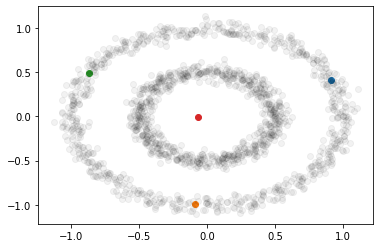

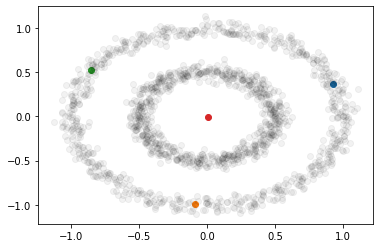

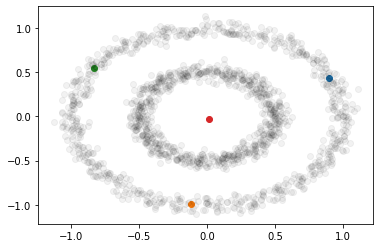

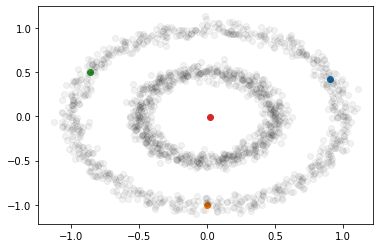

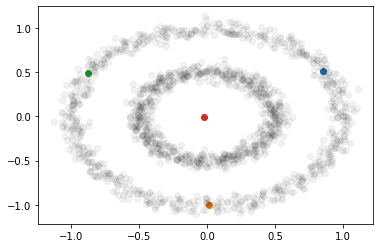

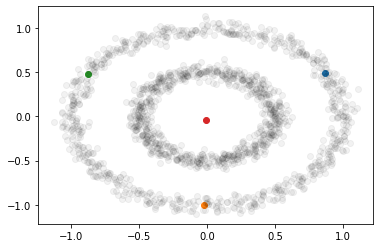

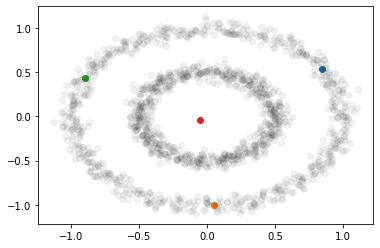

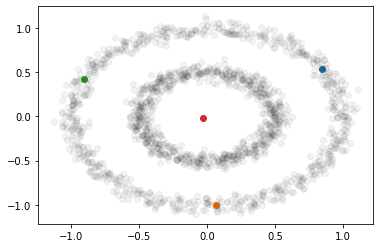

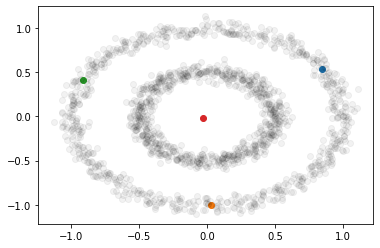

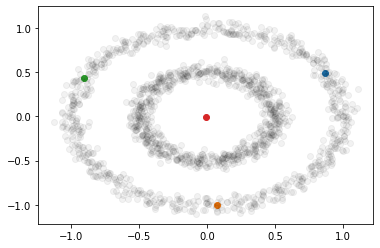

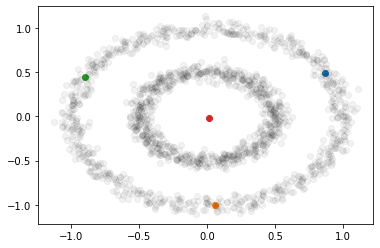

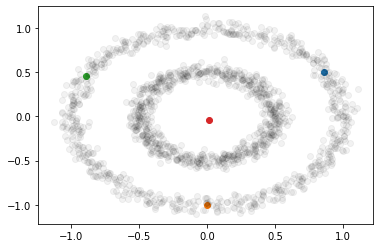

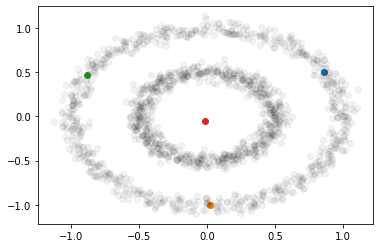

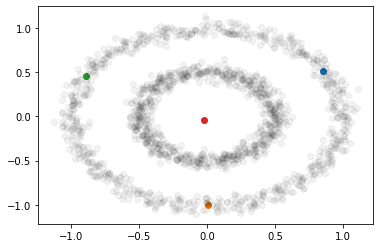

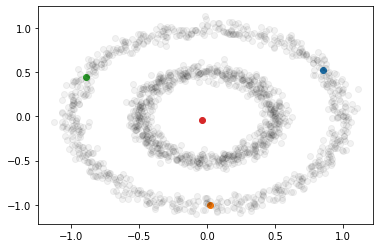

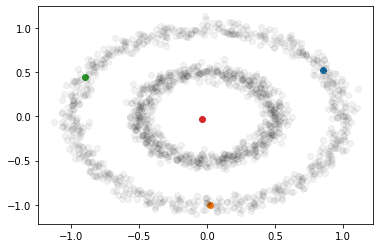

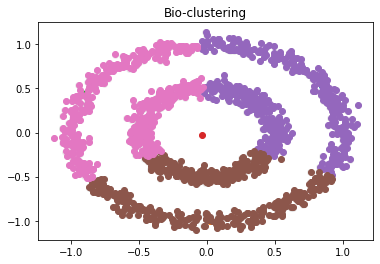

In [ ]:
n_clus = 4
synapses,x_mu = show_train(X,hid = n_clus)
clusters = np.argmax(np.dot(X-x_mu,synapses.T),axis = 1)
for i in range(n_clus):
	# get row indexes for samples with this cluster
	row_ix = where(clusters == i)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title('Bio-clustering')
pyplot.show()

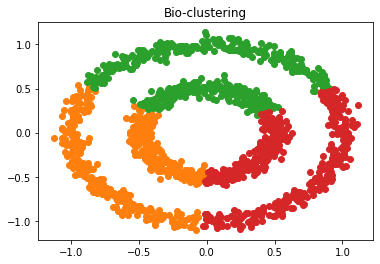

In [ ]:
n_clus = 4
synapses,x_mu = train(X,hid = n_clus)
clusters = np.argmax(np.dot(X-x_mu,synapses.T),axis = 1)
for i in range(n_clus):
	# get row indexes for samples with this cluster
	row_ix = where(clusters == i)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.title('Bio-clustering')
pyplot.show()

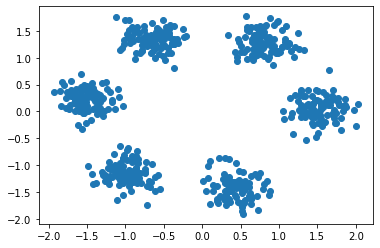

In [ ]:
sig = 0.2; n = 100; mag = 1.5
P = np.zeros((0,2))
for i in range(6):
  p1_x,p1_y = np.random.normal(mag*math.cos(i),sig,n), np.random.normal(mag*math.sin(i),sig,n)
  p1 = np.array([p1_x,p1_y]).reshape(2,n).T
  P = np.append(P,p1,axis = 0)
pyplot.scatter(P[:,0],P[:,1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


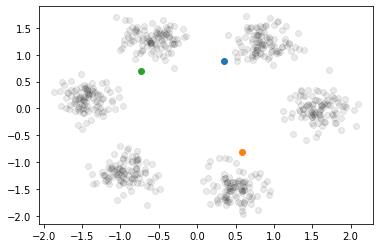

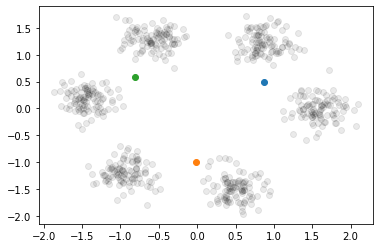

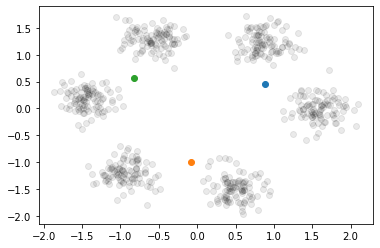

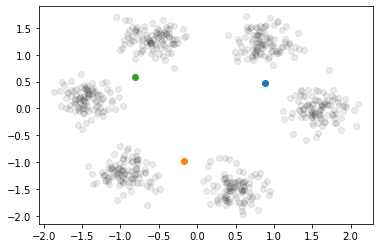

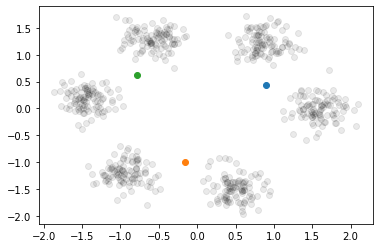

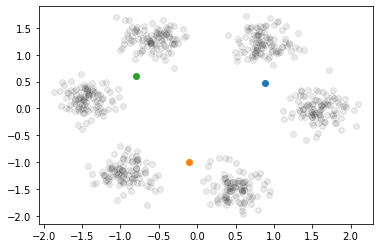

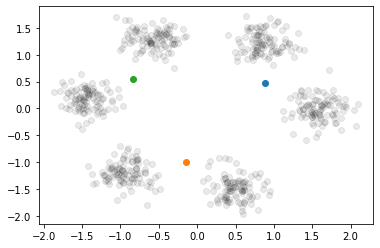

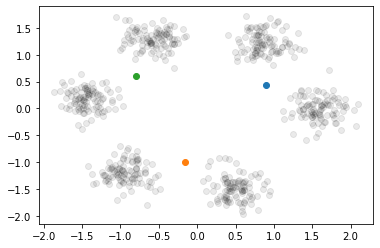

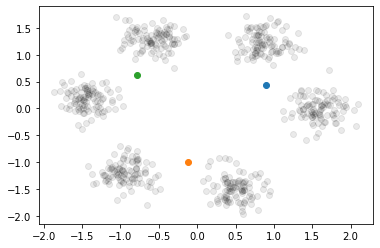

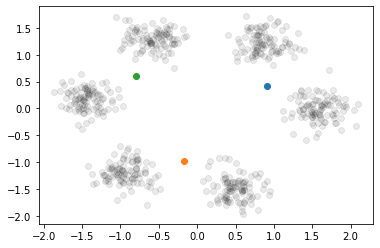

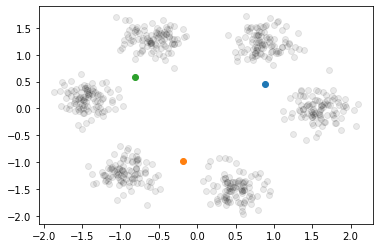

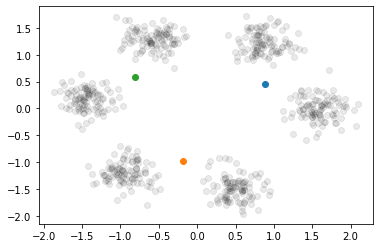

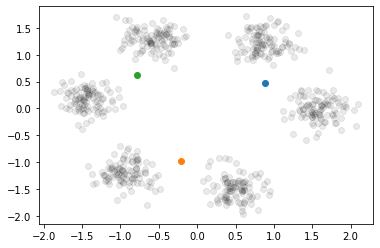

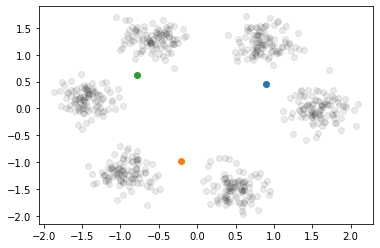

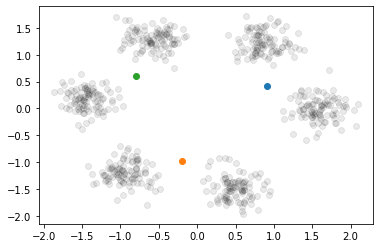

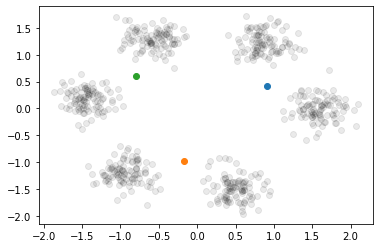

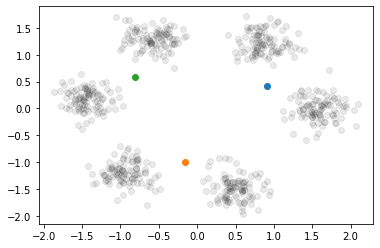

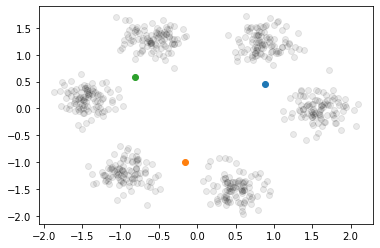

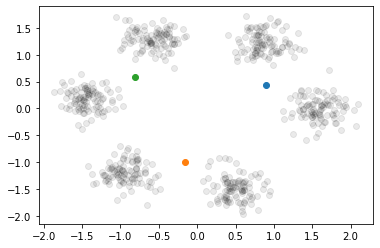

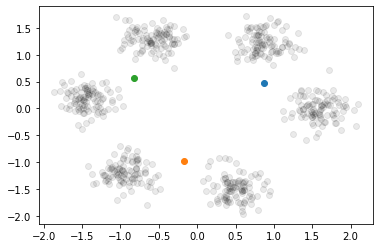

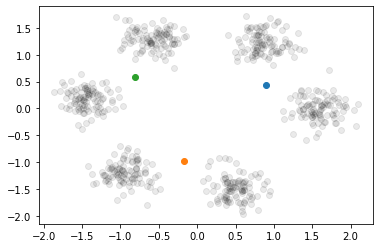

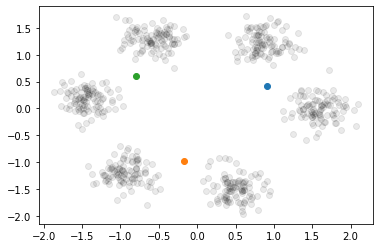

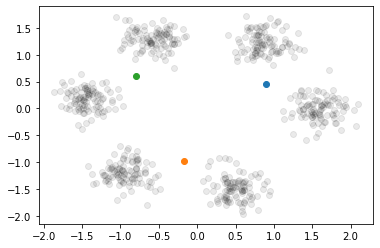

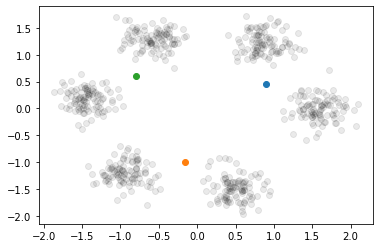

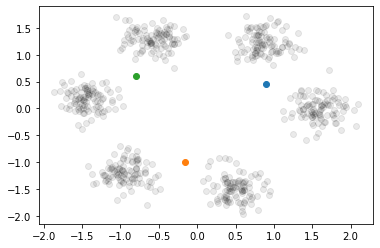

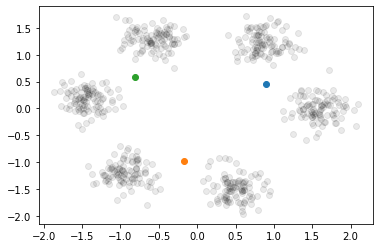

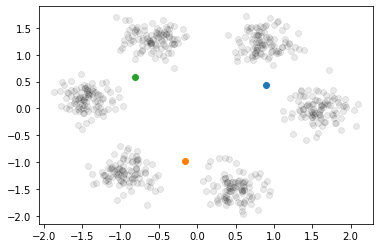

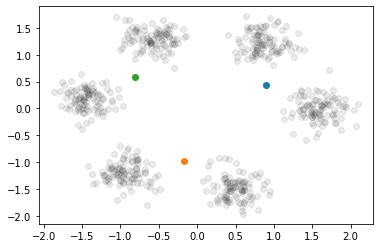

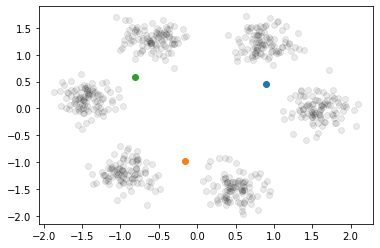

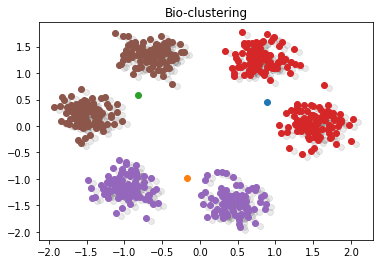

In [ ]:
n_clus = 3
synapses,p_mu = show_train(P,hid = n_clus,delta=0.1,Nep=30)
clusters = np.argmax(np.dot(P-p_mu,synapses.T),axis = 1)
for i in range(n_clus):
	# get row indexes for samples with this cluster
	row_ix = where(clusters == i)
	# create scatter of these samples
	pyplot.scatter(P[row_ix, 0], P[row_ix, 1])
# show the plot
pyplot.title('Bio-clustering')
pyplot.show()

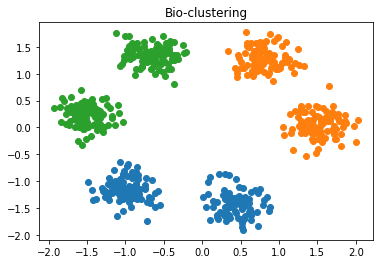

In [ ]:
synapses,p_mu = train(P,hid = n_clus,delta=2,Nep=100,sigma=1)
clusters = np.argmax(np.dot(P-p_mu,synapses.T),axis = 1)
for i in range(n_clus):
	# get row indexes for samples with this cluster
	row_ix = where(clusters == i)
	# create scatter of these samples
	pyplot.scatter(P[row_ix, 0], P[row_ix, 1])
# show the plot
pyplot.title('Bio-clustering')
pyplot.show()

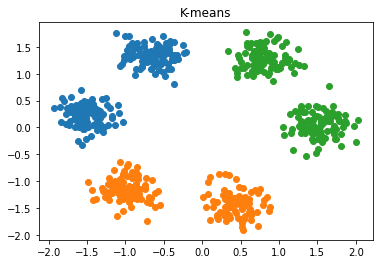

In [ ]:
# k-means clustering
# define the model
model = KMeans(n_clusters=3)
# fit the model
model.fit(P)
# assign a cluster to each example
yhat = model.predict(P)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(P[row_ix, 0], P[row_ix, 1])
# show the plot
pyplot.title('K-means')
pyplot.show()